In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from numpy.ma.extras import hstack

In [2]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)

In [3]:
type(survey)

sklearn.utils._bunch.Bunch

In [4]:
x = survey.data[survey.feature_names]
x.describe(include='all')

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534,534,534.000000,534,534.000000,534,534,534,534
unique,NaN,2,2,NaN,2,NaN,3,6,3,2
top,NaN,no,male,NaN,not_member,NaN,White,Other,Other,Married
freq,NaN,378,289,NaN,438,NaN,440,156,411,350
mean,13.018727,NaN,NaN,17.822097,NaN,36.833333,NaN,NaN,NaN,NaN
std,2.615373,NaN,NaN,12.379710,NaN,11.726573,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,8.000000,NaN,28.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,15.000000,NaN,35.000000,NaN,NaN,NaN,NaN
75%,15.000000,NaN,NaN,26.000000,NaN,44.000000,NaN,NaN,NaN,NaN


In [5]:
x.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,35,White,Other,Other,Married


In [6]:
x.shape

(534, 10)

In [7]:
y = survey.target.values.ravel()
survey.target.head()

0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64

In [8]:
l = list(x.columns)
l.append("salary")
pd.DataFrame(np.hstack((x.to_numpy(), y[:, np.newaxis]))[:10], columns=l)

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR,salary
0,8,no,female,21,not_member,35,Hispanic,Other,Manufacturing,Married,5.1
1,9,no,female,42,not_member,57,White,Other,Manufacturing,Married,4.95
2,12,no,male,1,not_member,19,White,Other,Manufacturing,Unmarried,6.67
3,12,no,male,4,not_member,22,White,Other,Other,Unmarried,4.0
4,12,no,male,17,not_member,35,White,Other,Other,Married,7.5
5,13,no,male,9,member,28,White,Other,Other,Unmarried,13.07
6,10,yes,male,27,not_member,43,White,Other,Other,Unmarried,4.45
7,12,no,male,9,not_member,27,White,Other,Other,Unmarried,19.47
8,16,no,male,11,not_member,33,White,Other,Manufacturing,Married,13.28
9,12,no,male,9,not_member,27,White,Other,Other,Unmarried,8.75


In [9]:
from sklearn.model_selection import train_test_split

xtr, xts, ytr, yts = train_test_split(x, y, random_state=42)

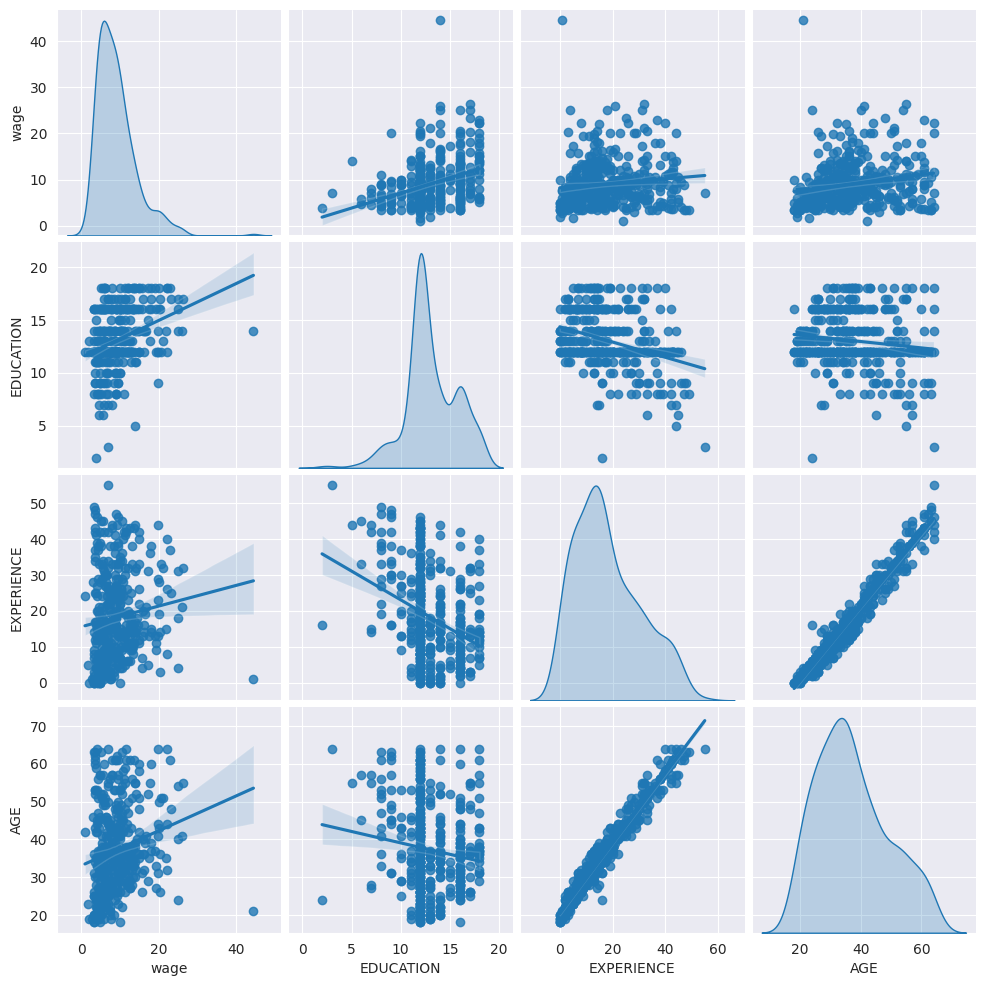

In [10]:
tr_ds = xtr.copy()
tr_ds.insert(0, "wage", ytr)

_ = sns.pairplot(tr_ds, kind="reg", diag_kind="kde")

In [11]:
survey.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    int64   
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    int64   
 4   UNION       534 non-null    category
 5   AGE         534 non-null    int64   
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), int64(3)
memory usage: 17.3 KB


In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["SOUTH", "SEX", "UNION", "RACE", "OCCUPATION", "SECTOR", "MARR"]
num_cols = ["EDUCATION", "EXPERIENCE", "AGE"]

In [13]:
preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), cat_cols),
    remainder="passthrough",
    verbose_feature_names_out=False,
)

In [14]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [15]:
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10),
        func=np.log10,
        inverse_func=sp.special.exp10,
    )
)

In [16]:
model.fit(xtr, ytr)

,steps,"[('columntransformer', ...), ('transformedtargetregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [17]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

maetr = median_absolute_error(ytr, model.predict(xtr))
yprd = model.predict(xts)
maets = median_absolute_error(yts, yprd)

In [18]:
scores = {
    "MedAE on training set": f"{maetr:.2f} $/hour",
    "MedAE on testing set": f"{maets:.2f} $/hour",
}

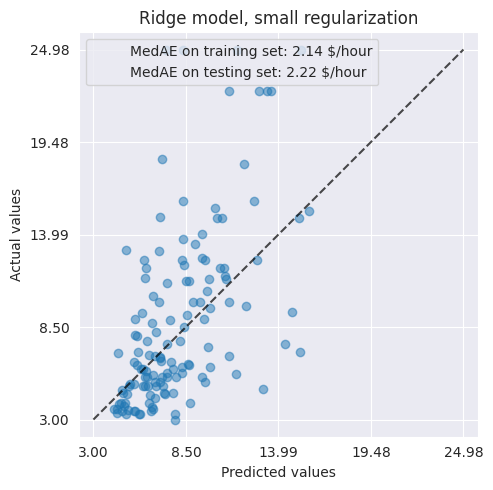

In [19]:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    yts, yprd, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, small regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

In [20]:
model[:-1]

,steps,"[('columntransformer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [21]:
model[:]

,steps,"[('columntransformer', ...), ('transformedtargetregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [24]:
model[0]

,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'if_binary'
,sparse_output,True


In [25]:
model[1]

,regressor,Ridge(alpha=1e-10)
,transformer,None
,func,<ufunc 'log10'>
,inverse_func,<ufunc 'exp10'>
,check_inverse,True
,alpha,1e-10
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'


In [27]:
model[-1]

,regressor,Ridge(alpha=1e-10)
,transformer,None
,func,<ufunc 'log10'>
,inverse_func,<ufunc 'exp10'>
,check_inverse,True
,alpha,1e-10
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'


In [28]:
model[-2]

,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'if_binary'
,sparse_output,True


In [29]:
model[:-1]

,steps,"[('columntransformer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [31]:
features_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=features_names,
)

coefs

,Coefficients
SOUTH_yes,-0.033823
SEX_male,0.090808
UNION_not_member,-0.117154
RACE_Hispanic,-0.013555
RACE_Other,-0.009111
RACE_White,0.022558
OCCUPATION_Clerical,0.000056
OCCUPATION_Management,0.090539
OCCUPATION_Other,-0.025091
OCCUPATION_Professional,0.071974
